In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy
import os
import pandas

In [172]:
import src.read_grib_ensemble_pygrib
from glob import glob
filelist = glob('/Volumes/Seagate/thesis_project/thesis_project_data/grib_output_files/YesradRun/wrfout_20130209T010000_000*.grib2')
filelist.sort()
datadict = src.read_grib_ensemble_pygrib.read_in_ensemble_variable(filelist,{"shortName":"prmsl"})

In [173]:
datadict['data'] = datadict['data'].mean(axis=2)/100.

In [16]:
import src.grib_reader

In [17]:
gribfn = '/Volumes/Seagate/thesis_project/thesis_project_data/grib_output_files/YesradRun/wrfout_20130209T010000_0001.grib2'

In [198]:
grib_ds = src.grib_reader.load_grib(gribfn)

In [251]:
filelist_ts = glob('/Volumes/Seagate/thesis_project/thesis_project_data/grib_output_files/YesradRun/wrfout_20130209T01*_0001.grib2')
filelist_ts.sort()
grib_ds_ts = src.grib_reader.load_grib(filelist_ts)

In [86]:
datadict2 ={
    'data':grib_ds['surface-dataset']['pressure'].values/100,
    'meta':{
        'xlats':grib_ds['surface-dataset']['latitude'].values,
        'xlons':grib_ds['surface-dataset']['longitude'].where(grib_ds['surface-dataset']['longitude']<180,grib_ds['surface-dataset']['longitude']-360).values,
        'projection':grib_ds['surface-dataset']['pressure'].crs,
        'valid_date':pandas.Timestamp(grib_ds['surface-dataset']['time'].values).to_pydatetime()
    }
}
plot_fn = os.path.join(
    '/Users/keenanfryer/ThesisProject/testing_jupyter_plots',
    'test_slp'
)
title = f'WRF-Yesrad Ensemble mem:0001 MSLP'

In [84]:
datadict_pygrib['meta']['projection']

<Derived Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [82]:
datadict2['meta']['projection']

<Derived Projected CRS: +proj=lcc +a=6371229.0 +b=6371229.0 +lon_0=280.0 + ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature


In [78]:
datadict_pygrib = datadict

In [107]:
datadict=datadict2
datadict['meta']['projection']

<Derived Projected CRS: +proj=lcc +a=6371229.0 +b=6371229.0 +lon_0=280.0 + ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (2SP)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [133]:
datadict=datadict_pygrib

In [126]:
datadict_pygrib['meta']['xlats'][-1,-1]

43.06002188663819

In [125]:
datadict2['meta']['xlats'][-1,-1]

43.061

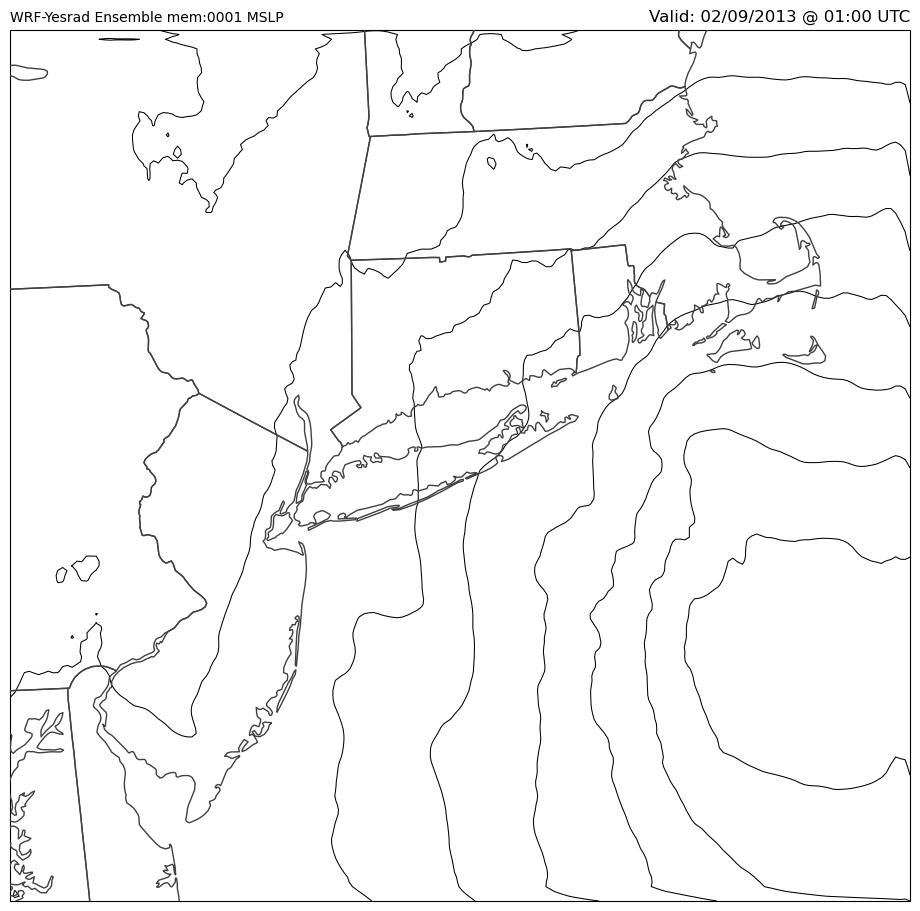

In [175]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1, projection=datadict['meta']['projection'],anchor='S')
ax1.set_position([0.05, 0.09, 0.9, 0.9], which='both')
#Set plot extent using projection from src grid
xlons = datadict['meta']['xlons']
xlats = datadict['meta']['xlats']
"""ax1.set_extent(
    [xlons[0,0],xlons[-1,-1],xlats[0,0],xlats[-1,-1]], 
    datadict2['meta']['projection']
)"""
#Add state and lake borders to map
states = NaturalEarthFeature(
    category='cultural',
    scale='10m',
    facecolor='none', 
    name='admin_1_states_provinces'
)
ax1.add_feature(states, edgecolor='#404040',
                linewidth=1.0, facecolor='none',
                zorder=4)
lakes = NaturalEarthFeature(
    category='physical',
    scale='10m',
    facecolor='none',
    name='lakes',
    edgecolor='#ffffff'
)
ax1.add_feature(lakes, edgecolor='#404040',
                linewidth=1.0, zorder=4)
#Set plot title(s) - with timing information on the right and actual
# plot title on the left
ax1.set_title(f"Valid: {datadict['meta']['valid_date']:%m/%d/%Y @ %H:%M} UTC",
                fontsize='large',loc='right')
ax1.set_title(title, fontsize='medium', loc='left')
plt.sca(ax1)
CFT2 = ax1.contour(
    datadict['meta']['xlons'], 
    datadict['meta']['xlats'], 
    datadict['data'], 
    numpy.arange(600,2000,5), 
    transform=crs.PlateCarree(), 
    colors='black',
    linewidths=0.75)

In [250]:
keyvals = {'typeOfLevel':'surface','name':'pressure'}
set(keyvals.keys()).issubset(set(["typeOfLevel","name"]))

True

In [288]:
from src.datasets import Dataset

In [296]:
ds = Dataset(gribfn,data_type='pygrib',variable_dict={'shortName':'2t','shortName':'prmsl'})

In [303]:
list(grib_ds['surface-dataset'].data_vars)

['temperature', 'dewpoint', 'pressure', 'height', 'uwind', 'vwind']

In [304]:
from src.ensemble_datasets import Dataset

In [306]:
ds = Dataset(gribfn)

In [309]:
ds.surface_data

datetime.datetime(2013, 2, 9, 1, 0)

In [310]:
fnlist= glob('/Volumes/Seagate/thesis_project/thesis_project_data/grib_output_files/YesradRun/wrfout*')
fnlist.sort()

In [312]:
fnlist = [os.path.basename(f) for f in fnlist]

In [328]:
def get_member_from_filename(f):
    member = f.split('.')[0].split('_')[2]
    return member

In [336]:
ensemble_dict = {}
members = list(set([get_member_from_filename(f) for f in fnlist]))
for member in members:
    ensemble_dict[member] = []

for fn in fnlist:
    member = get_member_from_filename(fn)
    